In [ ]:
# Preparing backtest results
import pandas as pd
from alphalens.utils import get_clean_factor_and_forward_returns

mean_reversion = pd.read_pickle('mean_reversion.pickle')

In [ ]:
print(f'Debug mean_reversion:\n{mean_reversion}')
print(f'Debug mean_reversion.prices:\n{mean_reversion.prices}')

# Construct a DataFrame with symbols in the columns and dates in the rows:
prices = pd.concat(
        [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()],
        axis=1
).T

print(f'Debug prices:\n{prices}')

# Convert columns names to strings
prices.columns = [col.symbol for col in prices.columns]

# Normalize the timestamps to midnight, preserving time zone information:
prices.index = prices.index.normalize()

# repeat a similar process for the factor data
factor_data = pd.concat(
        [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()],
        axis=1
).T

factor_data.columns = [col.symbol for col in factor_data.columns]

factor_data.index = factor_data.index.normalize()

# Create a MultiIndex with date in level 0 and symbol in level 1:
factor_data = factor_data.stack()

# Rename the MultiIndex
factor_data.index.names = ["date", "asset"]

Debug mean_reversion:
                                        period_open              period_close  \
2015-01-02 21:00:00+00:00 2015-01-02 14:31:00+00:00 2015-01-02 21:00:00+00:00   
2015-01-05 21:00:00+00:00 2015-01-05 14:31:00+00:00 2015-01-05 21:00:00+00:00   
2015-01-06 21:00:00+00:00 2015-01-06 14:31:00+00:00 2015-01-06 21:00:00+00:00   
2015-01-07 21:00:00+00:00 2015-01-07 14:31:00+00:00 2015-01-07 21:00:00+00:00   
2015-01-08 21:00:00+00:00 2015-01-08 14:31:00+00:00 2015-01-08 21:00:00+00:00   
...                                             ...                       ...   
2015-12-24 18:00:00+00:00 2015-12-24 14:31:00+00:00 2015-12-24 18:00:00+00:00   
2015-12-28 21:00:00+00:00 2015-12-28 14:31:00+00:00 2015-12-28 21:00:00+00:00   
2015-12-29 21:00:00+00:00 2015-12-29 14:31:00+00:00 2015-12-29 21:00:00+00:00   
2015-12-30 21:00:00+00:00 2015-12-30 14:31:00+00:00 2015-12-30 21:00:00+00:00   
2015-12-31 21:00:00+00:00 2015-12-31 14:31:00+00:00 2015-12-31 21:00:00+00:00   

     

In [ ]:
alphalens_data = get_clean_factor_and_forward_returns(
        factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

print(f'Debug Alpha data:{alphalens_data}')

Information Analysis


,5D,10D,21D,63D
IC Mean,0.039,0.010,0.040,0.056
IC Std.,0.165,0.178,0.161,0.168
Risk-Adjusted IC,0.237,0.058,0.247,0.334
t-stat(IC),3.033,0.747,3.163,4.281
p-value(IC),0.003,0.456,0.002,0.000
IC Skew,-0.284,0.061,0.555,-0.014
IC Kurtosis,-0.484,-0.572,-0.354,-0.749


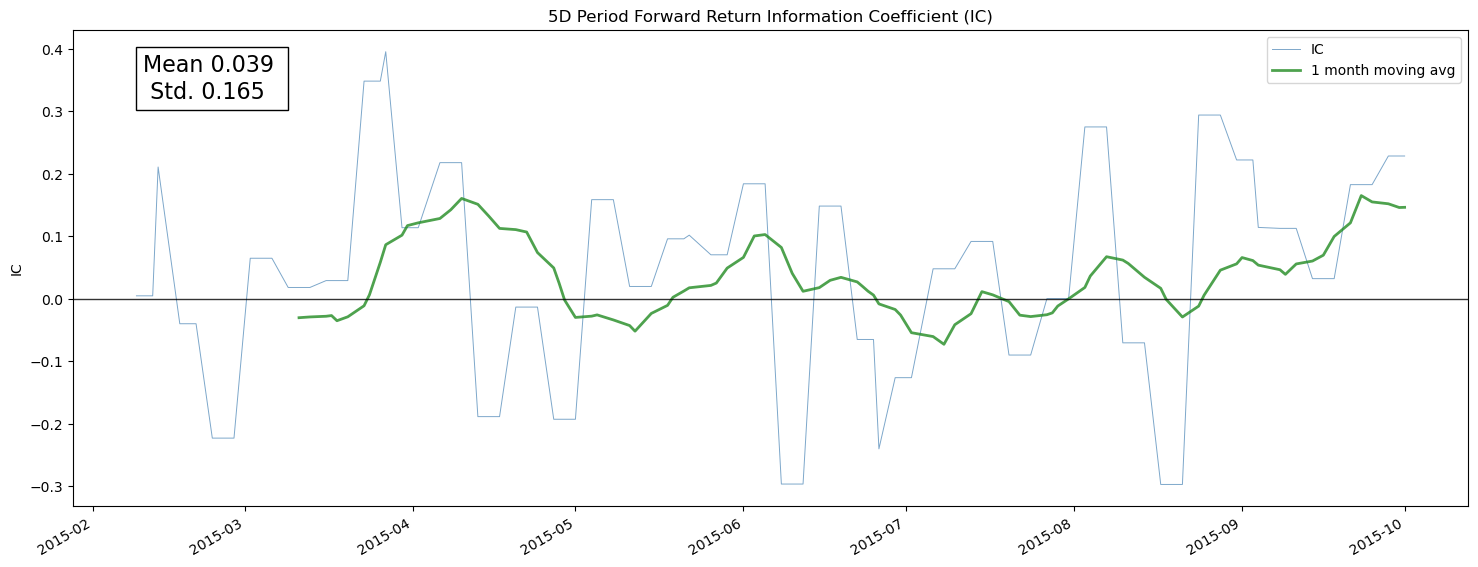

/tmp/ipykernel_49292/1408178003.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ic_by_quarter.index = ic_by_quarter.index.to_period("Q")


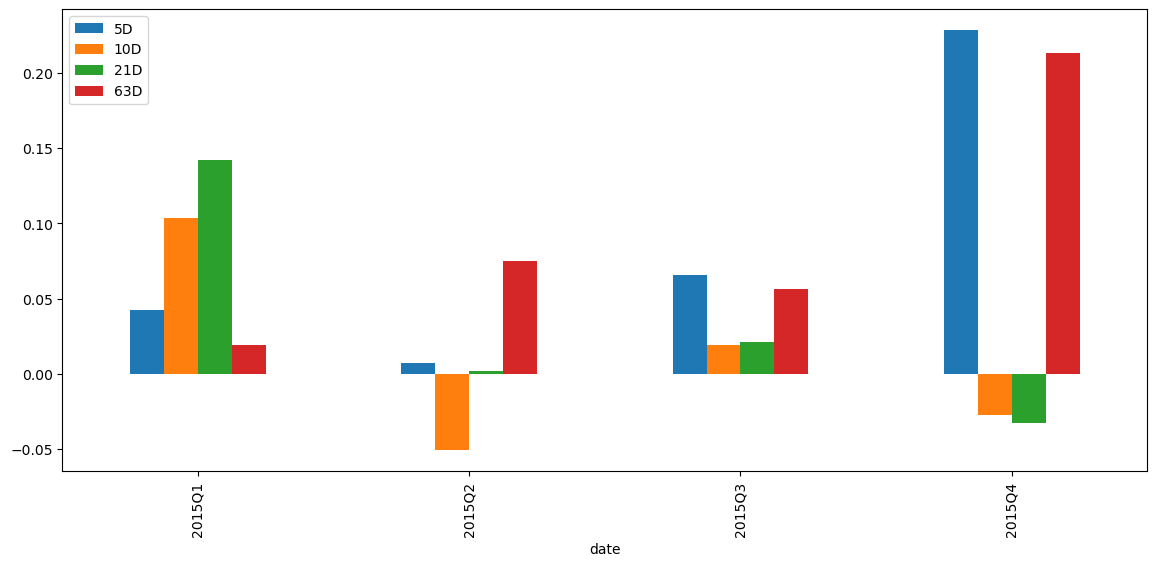

In [4]:
# Evaluating the information coeffiecient
from alphalens.performance import (
        factor_information_coefficient,
        mean_information_coefficient,
)

from alphalens.plotting import (
        plot_ic_ts,
        plot_information_table,
)

ic = factor_information_coefficient(alphalens_data)
import matplotlib.pyplot as plt
plot_information_table(ic)
plot_ic_ts(ic[['5D']])
plt.show()

ic_by_quarter = ic.resample("QE").mean()
ic_by_quarter.index = ic_by_quarter.index.to_period("Q")
ic_by_quarter.plot.bar(figsize=(14,6))
plt.show()



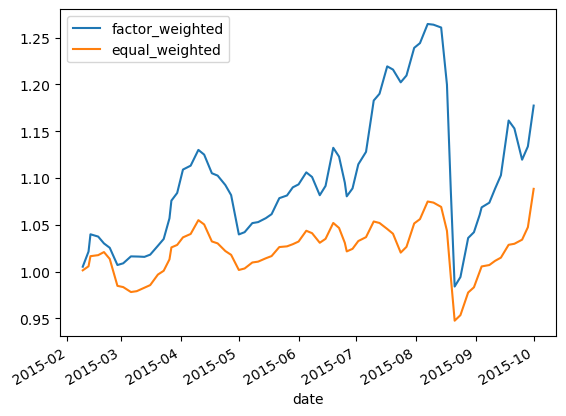

Debug mean_returns :
                       5D       10D       21D       63D
factor_quantile                                        
1               -0.001819 -0.002385 -0.009690 -0.017183
2                0.000165 -0.000812 -0.001734  0.002448
3                0.000770 -0.001053  0.004012  0.009727
4               -0.000532  0.003723  0.002409  0.001206
5                0.001413  0.000501  0.005001  0.003769


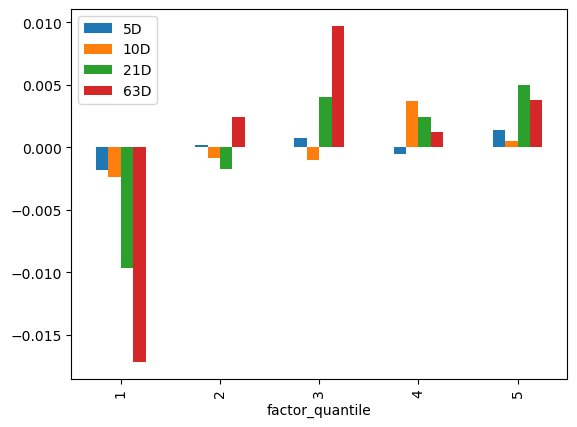

Debug mean_return_difference :
                                 5D       10D       21D       63D
date                                                             
2015-02-09 00:00:00+00:00 -0.013831 -0.041871 -0.017747 -0.030260
2015-02-10 00:00:00+00:00 -0.013831 -0.041871 -0.017747 -0.030260
2015-02-11 00:00:00+00:00 -0.013831 -0.041871 -0.017747 -0.030260
2015-02-12 00:00:00+00:00 -0.013831 -0.041871 -0.023455 -0.030260
2015-02-13 00:00:00+00:00 -0.041871 -0.032416 -0.023455 -0.030260
...                             ...       ...       ...       ...
2015-09-25 00:00:00+00:00  0.009120 -0.020378 -0.045023 -0.062154
2015-09-28 00:00:00+00:00 -0.035042 -0.008502 -0.002048 -0.047215
2015-09-29 00:00:00+00:00 -0.035042 -0.008502 -0.002048 -0.047215
2015-09-30 00:00:00+00:00 -0.035042 -0.008502 -0.002048 -0.047215
2015-10-01 00:00:00+00:00 -0.035042 -0.008502 -0.002048 -0.047215

[164 rows x 4 columns]


/tmp/ipykernel_49292/3671033929.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
/tmp/ipykernel_49292/3671033929.py:54: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .to_period("M")


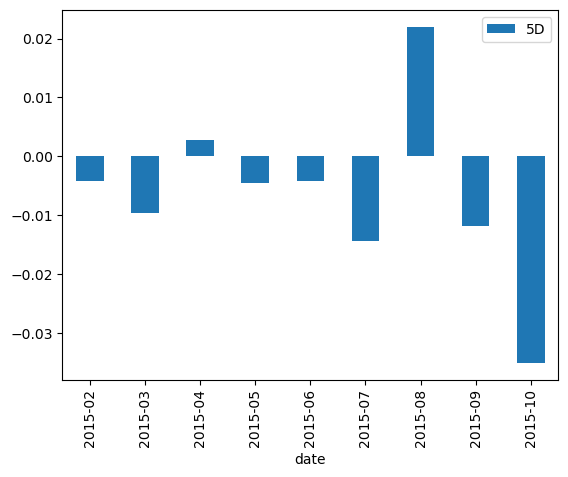

Debug alpha_beta :
                  5D       10D       21D       63D
Ann. alpha  0.081480  0.064637  0.091510  0.050019
beta        0.345353  0.102515  0.130451  0.308991


In [5]:

# Examining factor return performance
from alphalens.performance import (
        factor_returns,
        factor_cumulative_returns,
        mean_return_by_quantile,
        compute_mean_returns_spread,
        factor_alpha_beta,
)

returns = factor_returns(alphalens_data)

returns = factor_returns(alphalens_data, by_asset=True)

pd.concat(
        {
            "factor_weighted": factor_cumulative_returns(
                alphalens_data,
                period="5D"
            ),
            "equal_weighted": factor_cumulative_returns(
                alphalens_data,
                period="5D",
                equal_weight=True
            ),
        },
        axis=1,
).plot()
plt.show()

# Compute the mean return for factor quantiles across the forward returns:
mean_returns, _ = mean_return_by_quantile(alphalens_data)
print(f'Debug mean_returns :\n{mean_returns}')

mean_returns.plot.bar()
plt.show()

# Compute the difference in mean returns between the portfolios at the upper and lower quantiles:
mean_returns_by_date, _ = mean_return_by_quantile(
        alphalens_data,
        by_date=True
)

mean_return_difference, _ = compute_mean_returns_spread(
        mean_returns=mean_returns_by_date,
        upper_quant=1,
        lower_quant=5,
)
print(f'Debug mean_return_difference :\n{mean_return_difference}')

(
        mean_return_difference[["5D"]]
        .resample("M")
        .mean()
        .to_period("M")
        .plot
        .bar()
)
plt.show()

alpha_beta = factor_alpha_beta(alphalens_data)
print(f'Debug alpha_beta :\n{alpha_beta}')


Debug turnover:
date
2015-02-09 00:00:00+00:00     NaN
2015-02-10 00:00:00+00:00    0.00
2015-02-11 00:00:00+00:00    0.00
2015-02-12 00:00:00+00:00    0.00
2015-02-13 00:00:00+00:00    0.00
                             ... 
2015-09-25 00:00:00+00:00    0.00
2015-09-28 00:00:00+00:00    0.03
2015-09-29 00:00:00+00:00    0.00
2015-09-30 00:00:00+00:00    0.00
2015-10-01 00:00:00+00:00    0.00
Freq: C, Name: 1, Length: 164, dtype: float64


/tmp/ipykernel_49292/3302093813.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  turnover.resample('ME').mean().to_period('M').plot.bar()


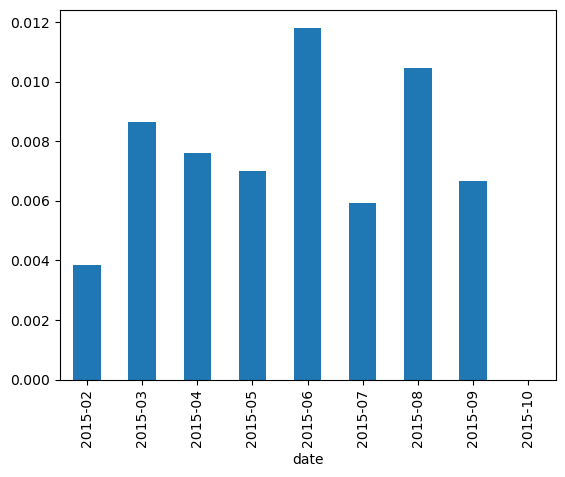

Debug factor_ac:
date
2015-02-09 00:00:00+00:00         NaN
2015-02-10 00:00:00+00:00    1.000000
2015-02-11 00:00:00+00:00    1.000000
2015-02-12 00:00:00+00:00    1.000000
2015-02-13 00:00:00+00:00    1.000000
                               ...   
2015-09-25 00:00:00+00:00    1.000000
2015-09-28 00:00:00+00:00    0.524487
2015-09-29 00:00:00+00:00    1.000000
2015-09-30 00:00:00+00:00    1.000000
2015-10-01 00:00:00+00:00    1.000000
Freq: C, Name: 1, Length: 164, dtype: float64


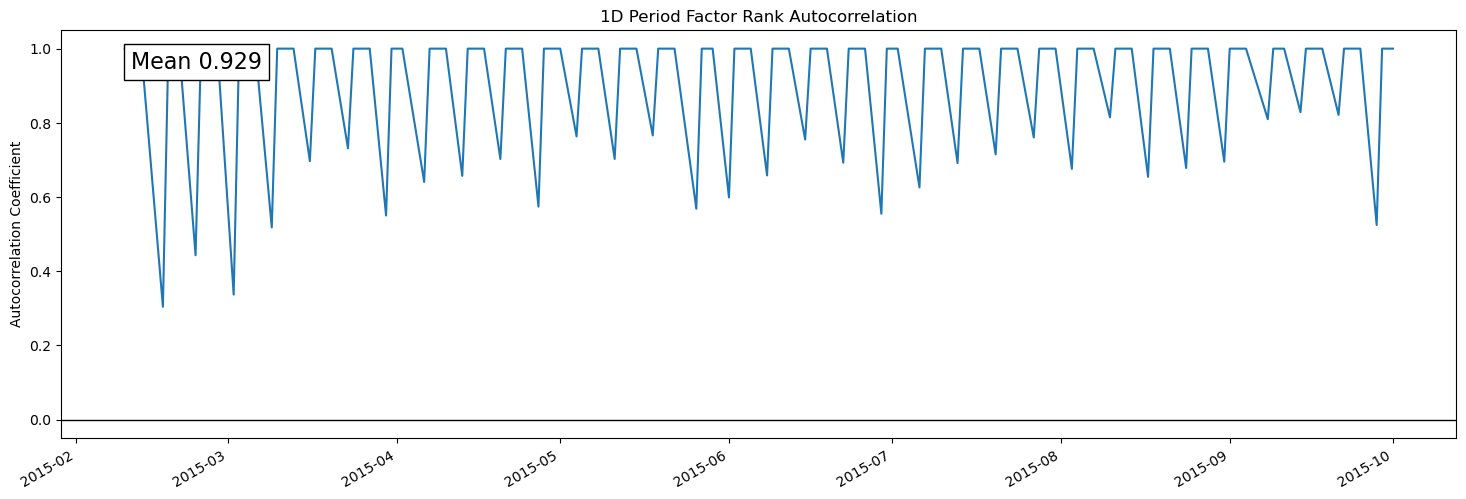

In [6]:
# Evaluating factor turnover
from alphalens.performance import (
        quantile_turnover,
        factor_rank_autocorrelation
)
from alphalens.plotting import plot_factor_rank_auto_correlation

# Compute the portfolio turnover for the first quantile
turnover = quantile_turnover(alphalens_data, quantile=1)
print(f'Debug turnover:\n{turnover}')

# Resample the daily values to monthly and plot the mean turnover for the first quantile:
turnover.resample('ME').mean().to_period('M').plot.bar()
plt.show()

# This function computes the autocorrelation of the provided factor's daily ranks.
# Specifically, it calculates the Spearman rank correlation betweem the factor values
# of a particular day and those of the subsequent day.
factor_ac = factor_rank_autocorrelation(alphalens_data)
print(f'Debug factor_ac:\n{factor_ac}')

plot_factor_rank_auto_correlation(factor_ac)
plt.show()
